In [27]:

import matplotlib.pyplot as plt
import numpy as np
# import h5py as h5
# import time
# import sys
# import copy
# #Quick fudge to make import from ../Scripts work
# import sys

# import string



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import pandas as pd
import seaborn as sns

print(np.asarray(range(4))+1)

[1 2 3 4]


In [28]:
for i in range(8):
    print(i)

0
1
2
3
4
5
6
7


In [29]:
df_name = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(4))+1)


print(df)
print(df['Kruckow18'])


print(df.columns)









    Kruckow18  Eldridge19  Tang20  Unnamed: 4
0       0.601  162.181010    51.5         NaN
1      16.800   63.095734   134.0         NaN
2      43.400   66.069345    59.7         NaN
3       3.080         NaN    97.6         NaN
4      34.500         NaN    63.2         NaN
..        ...         ...     ...         ...
58        NaN         NaN   132.0         NaN
59        NaN         NaN    84.8         NaN
60        NaN         NaN    54.8         NaN
61        NaN         NaN    37.1         NaN
62        NaN         NaN    26.5         NaN

[63 rows x 4 columns]
0      0.601
1     16.800
2     43.400
3      3.080
4     34.500
       ...  
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
Name: Kruckow18, Length: 63, dtype: float64
Index(['Kruckow18', 'Eldridge19', 'Tang20', 'Unnamed: 4'], dtype='object')


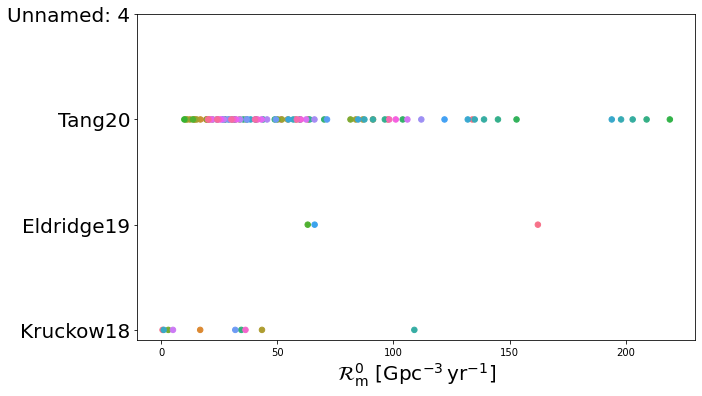

In [78]:
ncols=1
nrows=1
fs=20
ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'

f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,6), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


df_name = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(4))+1)

for ind_n, name in enumerate(df.columns):
    rate = df[name]
    mask_notna = (df[name].notna())
    rate = rate[mask_notna]
    colors = sns.color_palette("husl", len(rate))
    axe.scatter( rate, ind_n*np.ones_like(rate), s=30, c=colors)

    
axe.set_xlabel(ylabel, fontsize=fs)
axe.set_yticks(range(len(df.columns)))
axe.set_yticklabels(df.columns,  fontsize=fs, rotation=0) #rotation=55,
    
plt.show()

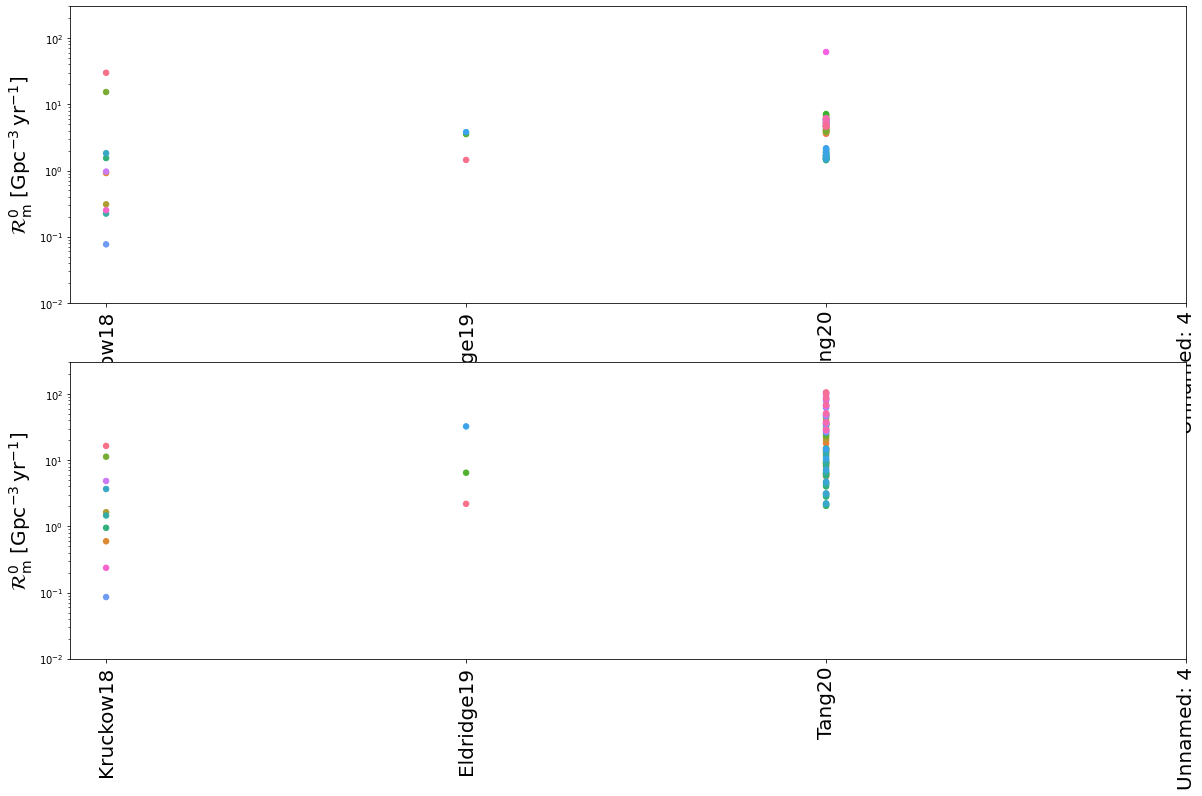

In [75]:
ncols=1
nrows=2
fs=20
ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'

f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,12), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


df_name_BHBH = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
df_name_BHNS = '/Users/floorbroekgaarden/Downloads/BHNS_intrinsic.csv'
df_name_NSNS = '/Users/floorbroekgaarden/Downloads/NSNS_intrinsic.csv'

df_BHBH = pd.read_csv(df_name_BHBH, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(4))+1)
df_BHNS = pd.read_csv(df_name_BHNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(4))+1)
df_NSNS = pd.read_csv(df_name_NSNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(4))+1)

for ind_n, name in enumerate(df.columns):
#     print('------')
#     print(name)
    rate_BHBH = df_BHBH[name][df_BHBH[name].notna()]#.astype(float)
    rate_BHNS = df_BHNS[name][df_BHNS[name].notna()]#.astype(float)
    rate_NSNS = df_NSNS[name][df_NSNS[name].notna()]#.astype(float)

    ratioBHNS = rate_BHNS.values / rate_BHBH.values
    ratioNSNS = rate_NSNS / rate_BHBH 
    
    colors = sns.color_palette("husl", len(rate_BHBH))
    axe[0].scatter(ind_n*np.ones_like(rate_BHBH), ratioBHNS, s=30, c=colors)
    axe[1].scatter(ind_n*np.ones_like(rate_BHBH), ratioNSNS, s=30, c=colors)

for ii in range(2):
    axe[ii].set_ylabel(ylabel, fontsize=fs)
    axe[ii].set_xticks(range(len(df.columns)))
    axe[ii].set_xticklabels(df.columns,  fontsize=fs, rotation=90) #rotation=55,
    axe[ii].set_yscale('log')
    axe[ii].set_ylim(0.01, 3*1E2)
    
plt.show()